In [1]:
#Stage One: Import the libraries and Scrape your Page

import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
url = 'https://www.metacritic.com/game/playstation-5/diablo-ii-resurrected/user-reviews?sort-by=date&num_items=100'

user_agent = {'User-agent': 'Mozilla/5.0'}
response = requests.get(url, headers = user_agent)

soup = BeautifulSoup(response.text, 'html.parser')

In [3]:
#Stage Two: Define an Empty Dictionary Reflecting the Data Categories

review_dict = {'name':[], 'date':[], 'rating':[], 'review':[]}

In [5]:
#Stage Three: Loop through and Store Structured Data

for review in soup.find_all('div', class_='review_content'): 
    if review.find('div', class_='name') == None:
        break 
    review_dict['name'].append(review.find('div', class_='name').find('a').text)
    review_dict['date'].append(review.find('div', class_='date').text)
    review_dict['rating'].append(review.find('div', class_='review_grade').find_all('div')[0].text)
    if review.find('span', class_='blurb blurb_expanded'): 
        review_dict['review'].append(review.find('span', class_='blurb blurb_expanded').text)
        print(review.find('span', class_='blurb blurb_expanded').text)
    elif review.find('div',class_='review_body').find('span') == None:
        review_dict['review'].append('No review text.')
        print("No review")
    else:
        review_dict['review'].append(review.find('div',class_='review_body').find('span').text)
        print(review.find('div',class_='review_body').find('span').text)

 Всем хорошей игры!
A videogame that remains immortal even after 20. The genre is inspired by this standard .. how many times do you say Diablo LIke ... A dip in the early 2000s. Immortal as always Diablo 2. Too many 0s dictated by ignorance.The lack of any news is a shortcoming ..It would have been 10 with crossplay and fewer disconnections
 The overall the game is fun enough, but it suffers from the lack of lessons learned in future games.
Ive had the game almost a full 2 weeks. No new patches. Game consistently crashes. Sometimes losing hours of play time. Absolutely unacceptable to not implement an autosave feature.
I played Diablo 2 a lot when I was younger and this remaster hits the spot for me. I bought it a week or 2 after release and have had no problem with bugs or the servers. People review bombing this game are clowns who find anything to be upset about. Great remaster would recommend
Brilliant game! Шикарная не устаревающая игра засияла новыми красками! Рекомендую
Simply t

In [6]:
#Stage Four: Convert from Dictionary to DataFrame and Display


ac_reviews = pd.DataFrame(review_dict)

In [7]:
ac_reviews

,name,date,rating,review
0,Thaksin,"Oct 8, 2021",7,"Не играл в оригинал, получал удовольствие от и..."
1,Manziflex,"Sep 25, 2021",8,A videogame that remains immortal even after 2...
2,Bossuk,"Oct 4, 2021",5,"Diablo 2 was an iconic game, and you could los..."
3,OptimusSentry,"Oct 3, 2021",3,Ive had the game almost a full 2 weeks. No new...
4,Skubasteve,"Oct 3, 2021",9,I played Diablo 2 a lot when I was younger and...
...,...,...,...,...
145,Slashrus,"Sep 24, 2021",10,"Best game ever - Remastered! All good, graphic..."
146,Csonty,"Sep 24, 2021",0,"Sorry to say, but this game is such a disappoi..."
147,Sheldontung,"Sep 24, 2021",0,I hope PlayStation could have it removed from ...
148,plexx,"Sep 24, 2021",3,Very dated game indeed. Only for die hard fans...


In [21]:
#Stage Five: Plot some Aspect of the Data
from collections import Counter

word_bag = Counter()
ac_reviews['review'].str.lower().str.split().apply(word_bag.update)


print(word_bag)



Counter({'the': 582, 'and': 324, 'to': 316, 'a': 284, 'i': 250, 'is': 234, 'of': 216, 'game': 178, 'you': 176, 'this': 160, 'it': 160, 'in': 120, 'with': 108, 'that': 98, 'but': 98, 'for': 92, 'on': 86, 'have': 82, 'as': 80, 'diablo': 70, 'my': 70, 'are': 68, 'was': 66, 'not': 66, 'like': 64, 'they': 58, 'from': 54, 'не': 50, 'your': 48, 'just': 48, 'all': 48, 'be': 48, 'и': 46, 'at': 40, 'get': 38, 'what': 38, 'remaster': 36, 'play': 36, 'would': 34, '2': 34, 'an': 34, 'if': 34, 'so': 34, 'back': 32, 'up': 32, 'game.': 32, 'на': 30, 'best': 30, 'will': 30, 'в': 28, 'been': 28, 'same': 28, 'really': 28, 'playing': 28, 'or': 28, 'did': 28, 'still': 28, 'how': 26, 'more': 26, "it's": 26, 'out': 26, '-': 26, 'into': 24, 'had': 24, 'graphics': 24, 'original': 24, 'even': 22, 'by': 22, 'issues': 22, 'about': 22, 'years': 22, 'can': 22, 'act': 22, 'good': 22, 'much': 22, 'что': 22, 'one': 20, 'review': 20, '20': 20, 'blizzard': 20, 'has': 20, 'character': 20, 'want': 20, 'exactly': 20, 'game

<BarContainer object of 20 artists>

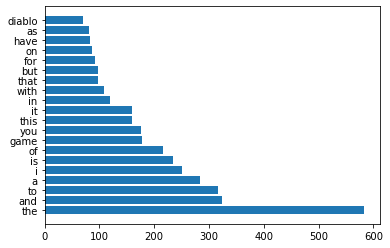

In [23]:
dh_words, dh_counts = zip(*word_bag.most_common(20))

import matplotlib.pyplot as plt
plt.barh(dh_words, dh_counts)